In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('dataR2.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


<Axes: xlabel='Insulin', ylabel='Count'>

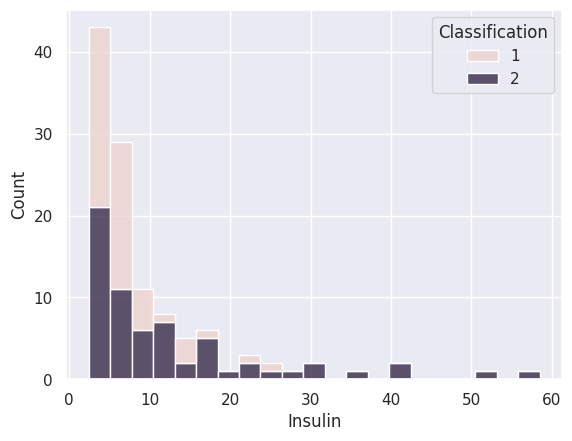

In [ ]:
sns.histplot(data=df,x="Insulin",hue="Classification",multiple="stack")

Classification
2    64
1    52
Name: count, dtype: int64


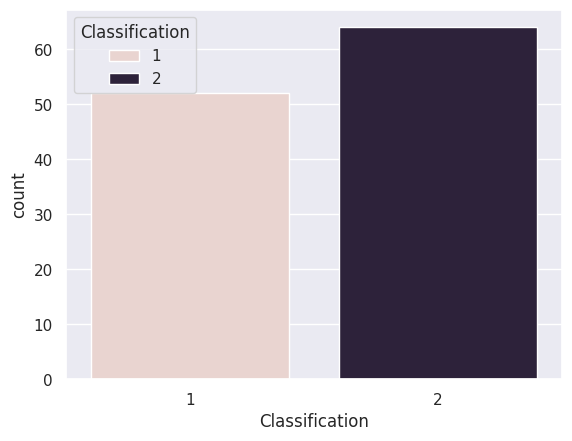

In [ ]:
sns.countplot(data=df,x="Classification",hue="Classification")
print(df.Classification.value_counts())

In [ ]:
from sklearn.utils import resample
df_majority=df[(df['Classification']==2)]
df_minority=df[(df['Classification']==1)]
df_minority_upsampled=resample(df_minority,n_samples=64, random_state=0)
df2=pd.concat([df_minority_upsampled, df_majority])
df2

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
44,71,30.300000,102,8.340,2.098344,56.5020,8.130000,4.29890,200.976,1
47,78,25.300000,60,3.508,0.519184,6.6330,10.567295,4.66380,209.749,1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
print(df2.Classification.value_counts())

Classification
1    64
2    64
Name: count, dtype: int64


<Axes: xlabel='Age'>

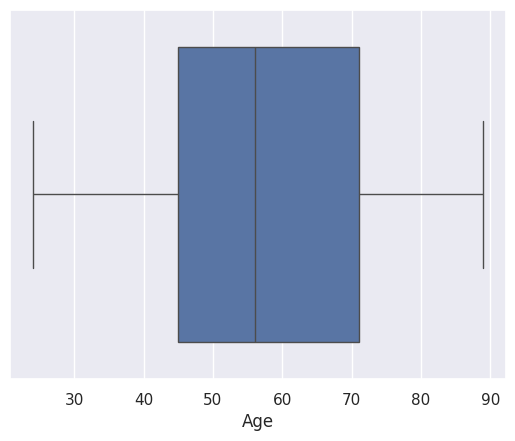

In [ ]:
sns.boxplot(x=df["Age"])

<Axes: xlabel='MCP.1'>

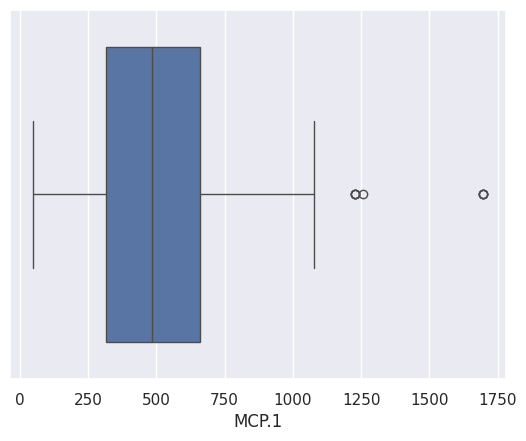

In [ ]:
sns.boxplot(x=df2["MCP.1"])

<Axes: xlabel='Resistin'>

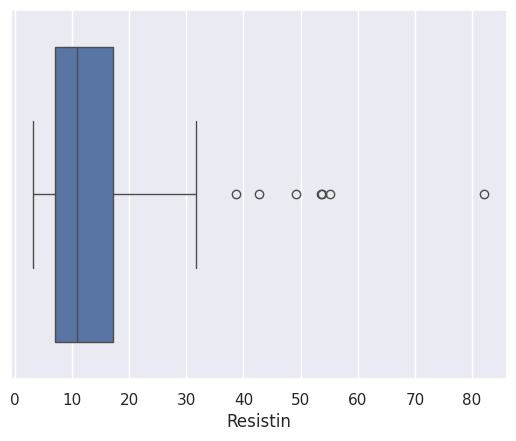

In [ ]:
sns.boxplot(x=df2["Resistin"])

<Axes: xlabel='Adiponectin'>

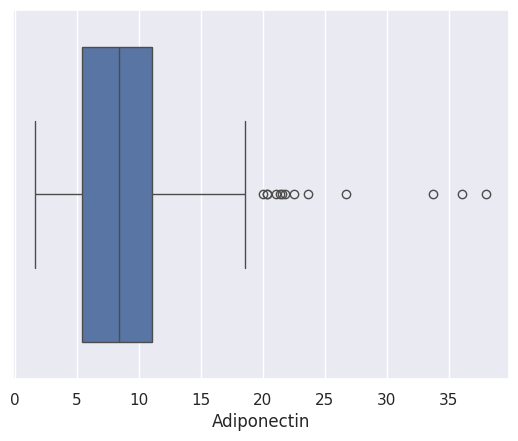

In [ ]:
sns.boxplot(x=df2["Adiponectin"])


<Axes: xlabel='Leptin'>

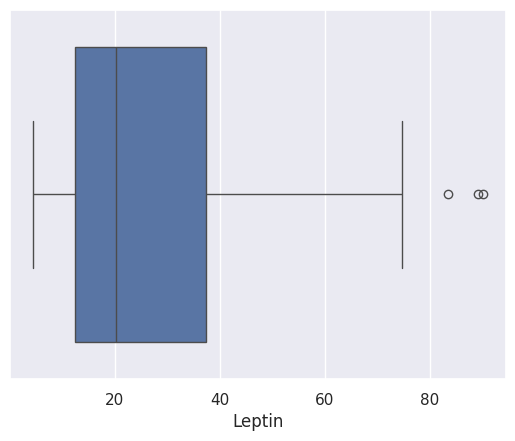

In [ ]:
sns.boxplot(x=df["Leptin"])


<Axes: xlabel='HOMA'>

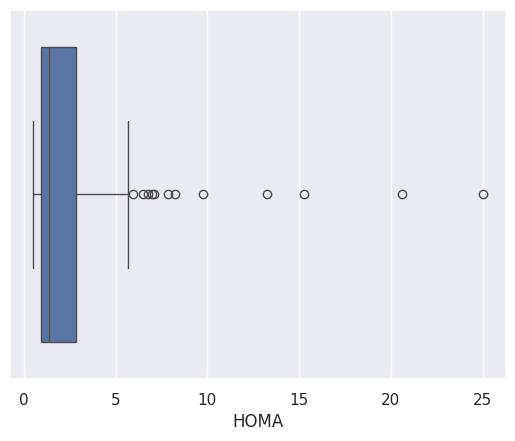

In [ ]:
sns.boxplot(x=df["HOMA"])

<Axes: xlabel='Insulin'>

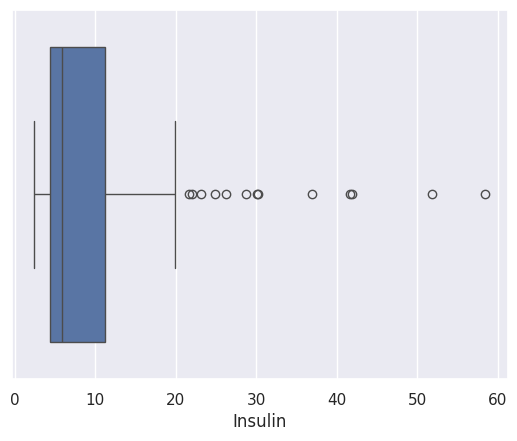

In [ ]:
sns.boxplot(x=df["Insulin"])

<Axes: xlabel='Glucose'>

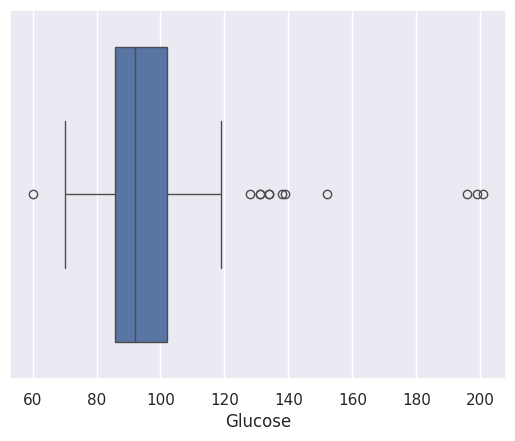

In [ ]:
sns.boxplot(x=df["Glucose"])


<Axes: xlabel='BMI'>

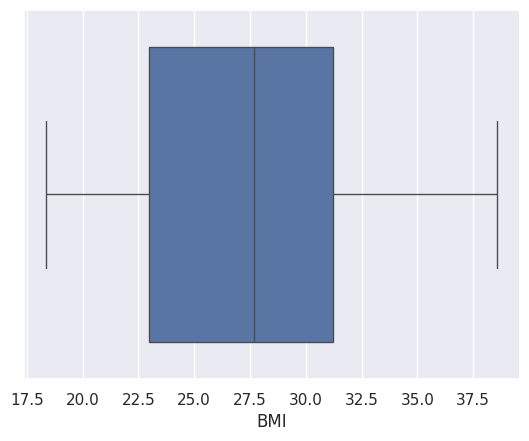

In [ ]:
sns.boxplot(x=df["BMI"])

In [ ]:
import scipy.stats as stats
z=np.abs(stats.zscore(df))
data_clean=df[(z<3).all(axis=1)]
data_clean.shape


(102, 10)

<Axes: >

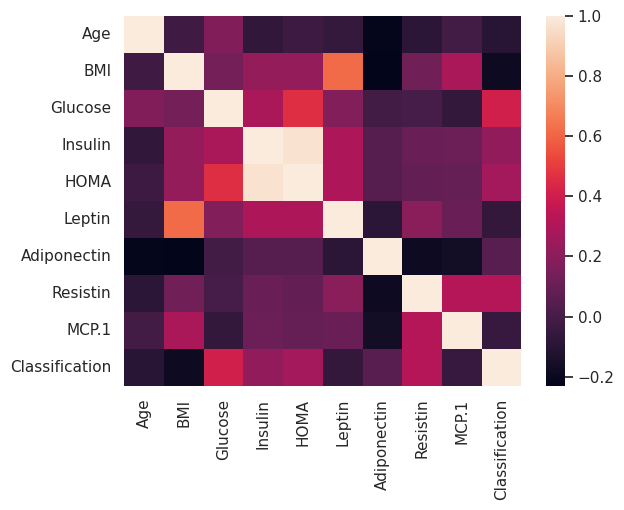

In [ ]:
sns.heatmap(data_clean.corr(),fmt='.2g')

In [ ]:
x=data_clean.drop('Classification', axis=1)
y=data_clean['Classification']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=rfc.predict(X_test)
print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("F1 score:", (f1_score(y_test,y_pred)))
print("Percision score:", (precision_score(y_test,y_pred)))
print("Recall score:", (recall_score(y_test,y_pred)))


Accuracy Score:  76.19 %
F1 score: 0.7826086956521738
Percision score: 0.75
Recall score: 0.8181818181818182


Text(0.5, 1.0, 'Accuracy Score: 76.19047619047619')

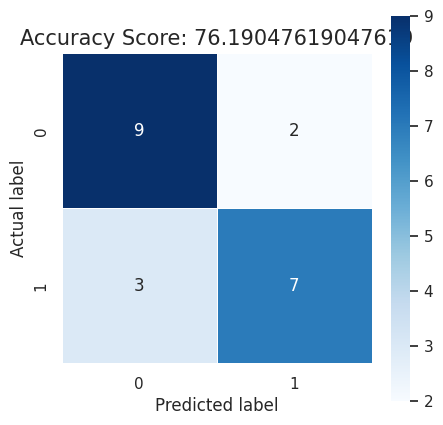

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title='Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred=lr.predict(X_test)
print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("F1 score:", (f1_score(y_test,y_pred)))
print("Percision score:", (precision_score(y_test,y_pred)))
print("Recall score:", (recall_score(y_test,y_pred)))


Accuracy Score:  61.9 %
F1 score: 0.6
Percision score: 0.6666666666666666
Recall score: 0.5454545454545454


Text(0.5, 1.0, 'Accuracy Score:61.904761904761905')

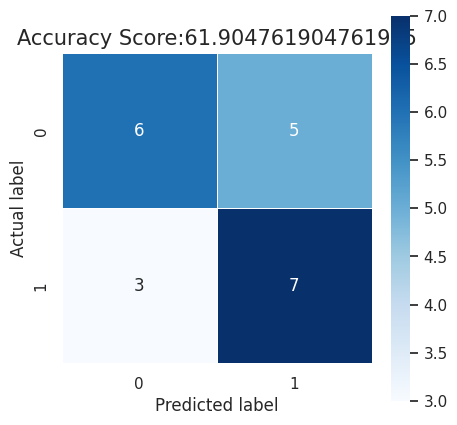

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title='Accuracy Score:{0}'.format(lr.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=dtree.predict(X_test)
print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("F1 score:", (f1_score(y_test,y_pred)))
print("Percision score:", (precision_score(y_test,y_pred)))
print("Recall score:", (recall_score(y_test,y_pred)))

Accuracy Score:  76.19 %
F1 score: 0.7368421052631579
Percision score: 0.875
Recall score: 0.6363636363636364


NameError: name 'dree' is not defined

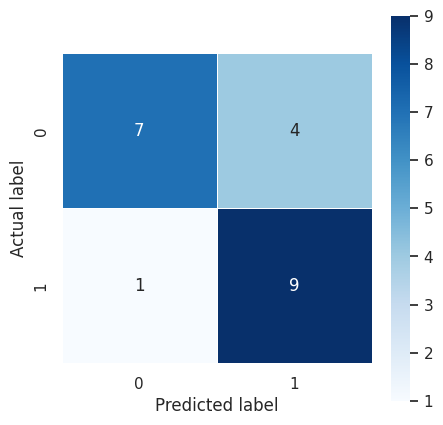

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title='Accuracy Score:{0}'.format(dree.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred=ada.predict(X_test)
print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("F1 score:", (f1_score(y_test,y_pred)))
print("Percision score:", (precision_score(y_test,y_pred)))
print("Recall score:", (recall_score(y_test,y_pred)))

Accuracy Score:  71.43 %
F1 score: 0.7272727272727273
Percision score: 0.7272727272727273
Recall score: 0.7272727272727273


Text(0.5, 1.0, 'Accuracy Score:71.42857142857143')

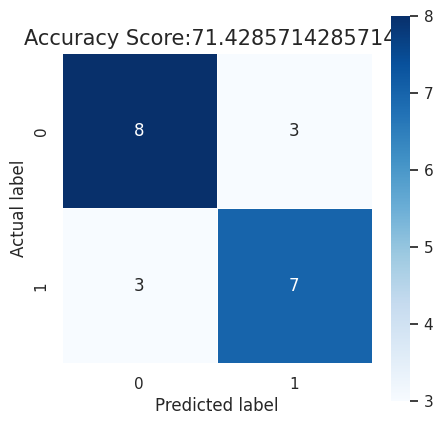

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title='Accuracy Score:{0}'.format(ada.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)

In [ ]:
from sklearn.svm import SVC
svcagain=SVC(random_state=0)
svcagain.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred=svcagain.predict(X_test)
print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
print("F1 score:", (f1_score(y_test,y_pred)))
print("Percision score:", (precision_score(y_test,y_pred)))
print("Recall score:", (recall_score(y_test,y_pred)))


Accuracy Score:  52.38 %
F1 score: 0.16666666666666669
Percision score: 1.0
Recall score: 0.09090909090909091


Text(0.5, 1.0, 'Accuracy Score:52.38095238095239')

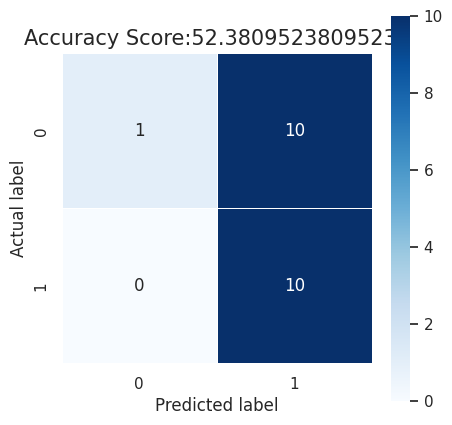

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title='Accuracy Score:{0}'.format(svcagain.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)